# Capstone Project: Titanic Data – ML Classification

In [1]:
# Import the needed libraries
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Step A: Read in Dataset and Drop the Too Distinct Variables 

In [2]:
titanic_data = pd.read_csv('titanic_data.csv', index_col = 'PassengerId')
titanic_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data = titanic_data.drop(['Cabin', 'Ticket'], axis=1)
titanic_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


### Step B: Examine Dataset

In [4]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
ParCh         int64
Fare        float64
Embarked     object
dtype: object

In [5]:
titanic_data.shape

(1309, 8)

### Step C: Display Descriptive Statistics and Variable Distributions

In [6]:
titanic_data.groupby(['Survived']).describe().T

Survived               0           1
Age    count  815.000000  494.000000
       mean    29.669319   28.540172
       std     12.836268   14.221584
       min      0.330000    0.170000
       25%     22.000000   21.000000
       50%     26.000000   27.000000
       75%     37.000000   36.000000
       max     74.000000   80.000000
Fare   count  814.000000  494.000000
       mean    23.879124   48.811497
       std     34.906946   68.594401
       min      0.000000    0.000000
       25%      7.854200   11.431275
       50%     10.500000   26.000000
       75%     26.000000   56.982300
       max    263.000000  512.329200
ParCh  count  815.000000  494.000000
       mean     0.311656    0.506073
       std      0.843270    0.888833
       min      0.000000    0.000000
       25%      0.000000    0.000000
       50%      0.000000    0.000000
       75%      0.000000    1.000000
       max      9.000000    9.000000
Pclass count  815.000000  494.000000
       mean     2.467485    2.010121
       std      0.765414    0.874416
       min      1.000000    1.000000
       25%      2.000000    1.000000
       50%      3.000000    2.000000
       75%      3.000000    3.000000
       max      3.000000    3.000000
SibSp  count  815.000000  494.000000
       mean     0.496933    0.502024
       std      1.164452    0.799972
       min      0.000000    0.000000
       25%      0.000000    0.000000
       50%      0.000000    0.000000
       75%      1.000000    1.000000
       max      8.000000    8.000000

In [7]:
titanic_data['Survived'].value_counts()

0    815
1    494
Name: Survived, dtype: int64

In [8]:
titanic_data['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [9]:
titanic_data['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [10]:
titanic_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

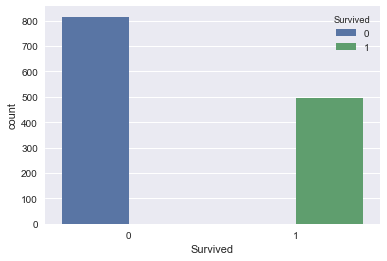

In [11]:
sns.countplot(x = 'Survived', hue='Survived', data = titanic_data)

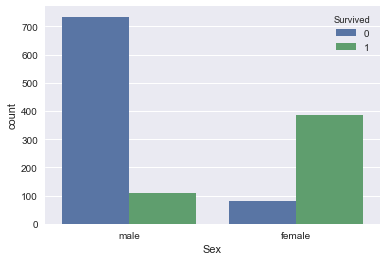

In [12]:
sns.countplot(x = 'Sex', hue='Survived', data = titanic_data)

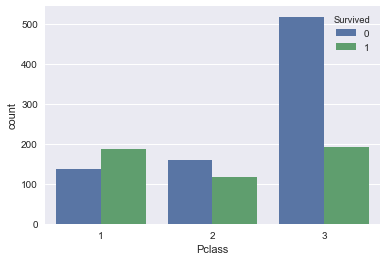

In [13]:
sns.countplot(x = 'Pclass', hue='Survived', data = titanic_data)

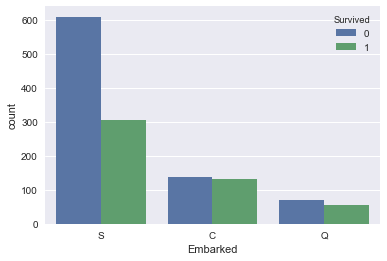

In [14]:
sns.countplot(x = 'Embarked', hue='Survived', data = titanic_data)

In [15]:
pd.pivot_table(titanic_data, values='Age', index=['Sex'], columns='Survived', margins = True,
               margins_name = 'total', aggfunc=lambda x: (len(x) / titanic_data.shape[0])*100)

Survived,0,1,total
Sex,,,
female,6.187930,29.411765,35.599694
male,56.073338,8.326967,64.400306
total,62.261268,37.738732,100.000000


In [16]:
pd.pivot_table(titanic_data, values='Age', index=['Pclass'], columns='Survived', margins = True,
               margins_name = 'total', aggfunc=lambda x: (len(x) / titanic_data.shape[0])*100)

Survived,0,1,total
Pclass,,,
1,10.466005,14.209320,24.675325
2,12.223071,8.938121,21.161192
3,39.572193,14.591291,54.163484
total,62.261268,37.738732,100.000000


In [17]:
# What percentage of 1st class female and male, 2nd class female and male and 3rd class female and male passengers survived?
pd.pivot_table(titanic_data, values='Age', index=['Pclass', 'Sex'], columns='Survived', margins = True,
               margins_name = 'total', aggfunc=lambda x: (len(x) / titanic_data.shape[0])*100)

Survived               0          1       total
Pclass Sex                                     
1      female   0.229183  10.771581   11.000764
       male    10.236822   3.437739   13.674561
2      female   0.458365   7.639419    8.097785
       male    11.764706   1.298701   13.063407
3      female   5.500382  11.000764   16.501146
       male    34.071811   3.590527   37.662338
total          62.261268  37.738732  100.000000

In [18]:
pd.pivot_table(titanic_data, values='Age', index=['Embarked'], columns='Survived', margins = True,
               margins_name = 'total', aggfunc=lambda x: (len(x) / titanic_data.shape[0])*100)

Survived,0,1,total
Embarked,,,
C,10.466005,10.160428,20.626432
Q,5.271199,4.125286,9.396486
S,46.524064,23.300229,69.824293
total,62.261268,37.585943,99.847212


### Step D: Handle Any Missing Values

In [19]:
# Check that there are no missing values by summing the nulls.
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
ParCh       0
Fare        1
Embarked    2
dtype: int64

In [20]:
null_data = titanic_data[titanic_data.isnull().any(axis=1)]
null_data

,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Embarked
PassengerId,,,,,,,,
62,1,1,female,38.0,0,0,80.0,NaN
830,1,1,female,62.0,0,0,80.0,NaN
1044,0,3,male,60.5,0,0,NaN,S


In [21]:
titanic_data['Fare'].fillna((titanic_data['Fare'].median()), inplace=True)

In [22]:
titanic_data['Embarked'].fillna((titanic_data['Embarked'].mode()[0]), inplace=True)

### Step E: Convert Categorical Variables to Numeric and/or Dummies

In [23]:
values = titanic_data['Sex'].values
sex = [1 if v == 'female' else 0 for v in values]
titanic_data['Sex'] = sex
titanic_data['Sex'].value_counts()

0    843
1    466
Name: Sex, dtype: int64

In [24]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S
2,1,1,1,38.0,1,0,71.2833,C
3,1,3,1,26.0,0,0,7.9250,S
4,1,1,1,35.0,1,0,53.1000,S
5,0,3,0,35.0,0,0,8.0500,S


In [25]:
Embarked_dum = pd.get_dummies(titanic_data['Embarked'], prefix = 'Em')
titanic_dum = pd.concat([titanic_data, Embarked_dum], axis=1)
titanic_dum = titanic_dum.drop(['Embarked'], axis = 1)
titanic_dum.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Em_C,Em_Q,Em_S
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,0,1
2,1,1,1,38.0,1,0,71.2833,1,0,0
3,1,3,1,26.0,0,0,7.9250,0,0,1
4,1,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,0,35.0,0,0,8.0500,0,0,1


In [26]:
titanic_data = titanic_dum

### Step F: Examine the Relationship Between the Variables

In [27]:
titanic_data.corr()
titanic_corr = titanic_data.corr()
columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'ParCh', 'Fare', 'Em_C', 'Em_Q', 'Em_S']  
grps = ['NegStrong', 'NegMedium', 'Weak', 'PosMedium', 'PosStrong']
for col in columns:
    titanic_corr[col] = pd.cut(titanic_corr[col], (-1, -0.6, -0.3, 0.3, 0.6, 1), labels=grps)
titanic_corr

,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Em_C,Em_Q,Em_S
Survived,PosStrong,Weak,PosStrong,Weak,Weak,Weak,Weak,Weak,Weak,Weak
Pclass,Weak,PosStrong,Weak,NegMedium,Weak,Weak,NegMedium,Weak,Weak,Weak
Sex,PosStrong,Weak,PosStrong,Weak,Weak,Weak,Weak,Weak,Weak,Weak
Age,Weak,NegMedium,Weak,PosStrong,Weak,Weak,Weak,Weak,Weak,Weak
SibSp,Weak,Weak,Weak,Weak,PosStrong,PosMedium,Weak,Weak,Weak,Weak
ParCh,Weak,Weak,Weak,Weak,PosMedium,PosStrong,Weak,Weak,Weak,Weak
Fare,Weak,NegMedium,Weak,Weak,Weak,Weak,PosStrong,Weak,Weak,Weak
Em_C,Weak,Weak,Weak,Weak,Weak,Weak,Weak,PosStrong,Weak,NegStrong
Em_Q,Weak,Weak,Weak,Weak,Weak,Weak,Weak,Weak,PosStrong,NegMedium
Em_S,Weak,Weak,Weak,Weak,Weak,Weak,Weak,NegStrong,NegMedium,PosStrong


### Step G: Decision Tree Classification

In [28]:
# Create response and predictor DataFrames
Y = titanic_data['Survived'] 
X = titanic_data.drop(['Survived'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,ParCh,Fare,Em_C,Em_Q,Em_S
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,0
3,3,1,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,3,0,35.0,0,0,8.0500,0,0,1


In [29]:
# Use 'Grid Search' to find the best set of DTC parameters
# using training set with criterion = 'entropy' 
# and random_state = 33
max_depth = [5, 6, 7]
min_split = [2, 3, 4] 
min_leaf = [1, 2, 3]
max_score = 0
for d in max_depth:
    for s in min_split:            
        for l in min_leaf:
            dtc = DecisionTreeClassifier (
                    criterion = 'entropy', 
                    random_state = 33,
                    max_depth = d, min_samples_split = s,
                    min_samples_leaf = l)
            dtc.fit (X, Y)   
            scores = cross_val_score(dtc, X, Y, cv=33)
            acc_score = scores.mean()           
            if acc_score >= max_score:
                max_score = acc_score
                max_d = d
                max_s = s
                max_l = l
print ("Max Depth:", max_d)
print ("Min Split:", max_s)
print ("Min Leaf:", max_l)

Max Depth: 5
Min Split: 4
Min Leaf: 2


In [30]:
# Split the DataFrames into train and test sets: rs = 33
X_train, X_test, Y_train, Y_test = train_test_split (
            X, Y, random_state = 33, test_size = 0.33)

In [31]:
# Use the best parameter values for max_depth, 
# min_samples_split and min_samples_leaf returned with 
# the 'Grid Search', along with criterion = 'entropy' 
# and random_state = 33 to run DTC on the training set
dtc = DecisionTreeClassifier (criterion = 'entropy',
              random_state = 33, max_depth = max_d,  
              min_samples_split = max_s, 
              min_samples_leaf = max_l)
dtc.fit (X_train, Y_train)    
Y_model = dtc.predict(X_test)

In [32]:
# Display the accuracy of the predictions
acc_score = accuracy_score (Y_test, Y_model)
acc_score

0.87731481481481477

In [33]:
# Display classification report 
# - Class labels:  0=Died, 1=Survived
print ('Classification Report')
print (classification_report (Y_test, Y_model))

Classification Report
             precision    recall  f1-score   support

          0       0.88      0.92      0.90       264
          1       0.87      0.80      0.84       168

avg / total       0.88      0.88      0.88       432



[[244  20]
 [ 33 135]]


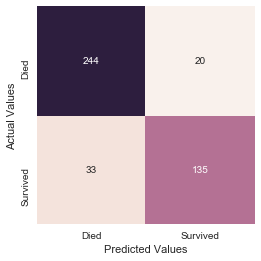

In [34]:
# Display the confusion matrix using a heat map
# Class labels:  0=Died, 1=Survived
mat = confusion_matrix (Y_test, Y_model)
print (mat)
sns.heatmap(mat, square=True, annot=True, cbar=False,
        fmt="d", xticklabels = ['Died','Survived'], 
                 yticklabels= ['Died','Survived'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [35]:
# Calculate Confusion Matrix Stats
TP = mat[0][0]
print ("True Positive: ", TP)
TN = mat[1][1]
print ("True Negative: ", TN)
FP = mat[1][0]
print ("False Positive: ", FP)
FN = mat[0][1]
print ("False Negative: ", FN)
P = TP + FN
print ("Actual Positive: ", P)
N = TN + FP
print ("Actual Negative: ", N)
TPR_str = str (TP) + '/' + str (P) + ' ='
TPR = TP / P
print ("True Positive Rate: ", TPR_str, TPR)
TNR_str = str (TN) + '/' + str (N) + ' ='
TNR = TN / N
print ("True Negative Rate: ", TNR_str, TNR)
PPV_str = str (TP) + '/' + str (TP + FP) + ' ='
PPV = TP / (TP + FP)
print ("Positive Predictive Value: ", PPV_str, PPV) 
NPV_str = str (TN) + '/' + str (TN + FN) + ' ='
NPV = TN / (TN + FN)
print ("Negative Predictive Value: ", NPV_str, NPV)
FNR_str = str (FN) + '/' + str (P) + ' ='
FNR = FN / P
print ("False Negative Rate: ", FNR_str, FNR)
FPR_str = str (FP) + '/' + str (N) + ' ='
FPR = FP / N
print ("False Positive Rate: ", FPR_str, FPR)
FDR_str = str (FP) + '/' + str (FP + TP) + ' ='
FDR = FP / (FP + TP)
print ("False Discovery Rate: ", FDR_str, FDR)
FOR_str = str (FN) + '/' + str (FN + TN) + ' ='
FOR = FN / (FN + TN)
print ("False Omission Rate: ", FOR_str, FOR)
ACC_str = str (TP + TN) + '/' +  str (P + N)
ACC = (TP + TN) / (P + N) 
print ("Accuracy: ", ACC_str, ACC)
ALL = P + N
print ("All: ", ALL)

True Positive:  244
True Negative:  135
False Positive:  33
False Negative:  20
Actual Positive:  264
Actual Negative:  168
True Positive Rate:  244/264 = 0.924242424242
True Negative Rate:  135/168 = 0.803571428571
Positive Predictive Value:  244/277 = 0.880866425993
Negative Predictive Value:  135/155 = 0.870967741935
False Negative Rate:  20/264 = 0.0757575757576
False Positive Rate:  33/168 = 0.196428571429
False Discovery Rate:  33/277 = 0.119133574007
False Omission Rate:  20/155 = 0.129032258065
Accuracy:  379/432 0.877314814815
All:  432


In [36]:
# Step G-9
# Create the Decision Tree Graphic
X_cols = ['Pclass','Sex','Age','SibSp','ParCh','Fare',
          'Em_C','Em_Q','Em_S']
# 1=Survived, 0=Died
with open ("titanic.dot", 'w') as f:
    f = export_graphviz(dtc, out_file=f, 
             feature_names=list(X_cols),
             class_names=('Died','Survived'),
             filled=True,rounded=True,
             special_characters=True)

### Step H: Random Forest Classification 

In [37]:
# Use 'Grid Search' to find the best set of RFC 
# parameters using full dataset with n_estimators = 33, 
# criterion = 'entropy' and random_state = 33
max_depth = [5, 6, 7]
min_split = [2, 3, 4] 
min_leaf = [1, 2, 3]
max_score = 0
for d in max_depth:
    for s in min_split:            
        for l in min_leaf:
            rfc = RandomForestClassifier (
                     n_estimators = 33, 
                     criterion = 'entropy', 
                     random_state = 33, 
                     max_depth = d, min_samples_split = s, 
                     min_samples_leaf = l)
            rfc.fit (X, Y)    
            Y_model = rfc.predict(X)
            acc_score = accuracy_score (Y, Y_model)
            if acc_score >= max_score:
                max_score = acc_score
                max_d = d
                max_s = s
                max_l = l
print ("Max Depth:", max_d)
print ("Min Split:", max_s)
print ("Min Leaf:", max_l)

Max Depth: 7
Min Split: 3
Min Leaf: 1


In [38]:
# Use the best parameter values for max_depth, 
# min_samples_split and min_samples_leaf returned with 
# the 'Grid Search', along with n_estimators = 33, 
# criterion = 'entropy' and random_state = 33 to run 
# RFC on the whole set
rfc = RandomForestClassifier (criterion = 'entropy',
         n_estimators = 33, random_state = 33, 
         max_depth = 7, min_samples_split = 3,
         min_samples_leaf = 1)
rfc.fit (X, Y)    
Y_model = rfc.predict(X)

In [39]:
# Display the accuracy of the predictions
acc_score = accuracy_score (Y, Y_model)
acc_score

0.89686783804430859

In [40]:
# Display classification report 
# - Class labels:  0=Died, 1=Survived
print ('Classification Report')
print (classification_report (Y, Y_model))

Classification Report
             precision    recall  f1-score   support

          0       0.89      0.95      0.92       815
          1       0.91      0.80      0.85       494

avg / total       0.90      0.90      0.90      1309



[[777  38]
 [ 97 397]]


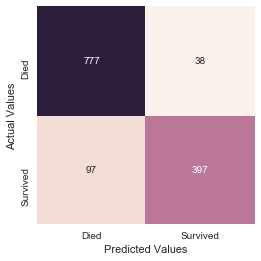

In [41]:
# Display the confusion matrix using a heat map
# Class labels:  0=Died, 1=Survived
mat = confusion_matrix (Y, Y_model)
print (mat)
sns.heatmap(mat, square=True, annot=True, cbar=False,
        fmt="d", xticklabels = ['Died','Survived'], 
                 yticklabels= ['Died','Survived'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [42]:
# Calculate Confusion Matrix Stats
TP = mat[0][0]
print ("True Positive: ", TP)
TN = mat[1][1]
print ("True Negative: ", TN)
FP = mat[1][0]
print ("False Positive: ", FP)
FN = mat[0][1]
print ("False Negative: ", FN)
P = TP + FN
print ("Actual Positive: ", P)
N = TN + FP
print ("Actual Negative: ", N)
TPR_str = str (TP) + '/' + str (P) + ' ='
TPR = TP / P
print ("True Positive Rate: ", TPR_str, TPR)
TNR_str = str (TN) + '/' + str (N) + ' ='
TNR = TN / N
print ("True Negative Rate: ", TNR_str, TNR)
PPV_str = str (TP) + '/' + str (TP + FP) + ' ='
PPV = TP / (TP + FP)
print ("Positive Predictive Value: ", PPV_str, PPV) 
NPV_str = str (TN) + '/' + str (TN + FN) + ' ='
NPV = TN / (TN + FN)
print ("Negative Predictive Value: ", NPV_str, NPV)
FNR_str = str (FN) + '/' + str (P) + ' ='
FNR = FN / P
print ("False Negative Rate: ", FNR_str, FNR)
FPR_str = str (FP) + '/' + str (N) + ' ='
FPR = FP / N
print ("False Positive Rate: ", FPR_str, FPR)
FDR_str = str (FP) + '/' + str (FP + TP) + ' ='
FDR = FP / (FP + TP)
print ("False Discovery Rate: ", FDR_str, FDR)
FOR_str = str (FN) + '/' + str (FN + TN) + ' ='
FOR = FN / (FN + TN)
print ("False Omission Rate: ", FOR_str, FOR)
ACC_str = str (TP + TN) + '/' +  str (P + N)
ACC = (TP + TN) / (P + N) 
print ("Accuracy: ", ACC_str, ACC)
ALL = P + N
print ("All: ", ALL)

True Positive:  777
True Negative:  397
False Positive:  97
False Negative:  38
Actual Positive:  815
Actual Negative:  494
True Positive Rate:  777/815 = 0.953374233129
True Negative Rate:  397/494 = 0.803643724696
Positive Predictive Value:  777/874 = 0.889016018307
Negative Predictive Value:  397/435 = 0.912643678161
False Negative Rate:  38/815 = 0.0466257668712
False Positive Rate:  97/494 = 0.196356275304
False Discovery Rate:  97/874 = 0.110983981693
False Omission Rate:  38/435 = 0.0873563218391
Accuracy:  1174/1309 0.896867838044
All:  1309


### Step I: Logistic Regression Classification

In [43]:
# Transform the predictors using the normalization 
# scaler to interval [0, 1]
sc = MinMaxScaler()
sc.fit(X)
X_norm = sc.transform(X)

In [44]:
# Use 'Grid Search' to find the best set of Log Reg 
# parameters using normalized predictors
max_score = 0
for p in ['l1', 'l2']:
    for c in [0.01,0.05,0.1,0.5,1,5]:
        lr = LogisticRegression (C=c, penalty = p)
        lr.fit (X_norm, Y)   
        scores = cross_val_score(lr, X_norm, Y, cv=33)
        acc_score = scores.mean()
        if acc_score >= max_score:  
            max_score = acc_score
            best_c = c
            best_p = p
print ("Best Test score and params:", max_score, best_c, best_p)

Best Test score and params: 0.856060606061 0.1 l2


In [45]:
# Use the parameter values for C and penalty returned above 
# with Logistic Regression classifier on training set 
lr = LogisticRegression (C=best_c, penalty = best_p)
lr.fit (X_train, Y_train)
Y_model = lr.predict(X_test)

In [46]:
# Display the accuracy of the predictions
acc_score = accuracy_score (Y_test, Y_model)
acc_score

0.86805555555555558

In [47]:
# Display classification report 
# - Class labels:  0=Died, 1=Survived
print ('Classification Report')
print (classification_report (Y_test, Y_model))

Classification Report
             precision    recall  f1-score   support

          0       0.88      0.91      0.89       264
          1       0.85      0.80      0.83       168

avg / total       0.87      0.87      0.87       432



[[240  24]
 [ 33 135]]


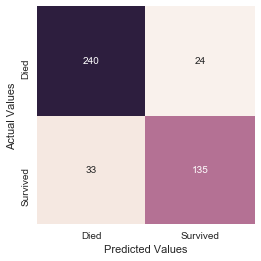

In [48]:
# Display the confusion matrix using a heat map
# Class labels:  0=Died, 1=Survived
mat = confusion_matrix (Y_test, Y_model)
print (mat)
sns.heatmap(mat, square=True, annot=True, cbar=False,
        fmt="d", xticklabels = ['Died','Survived'], 
                 yticklabels= ['Died','Survived'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [49]:
# Calculate Confusion Matrix Stats
TP = mat[0][0]
print ("True Positive: ", TP)
TN = mat[1][1]
print ("True Negative: ", TN)
FP = mat[1][0]
print ("False Positive: ", FP)
FN = mat[0][1]
print ("False Negative: ", FN)
P = TP + FN
print ("Actual Positive: ", P)
N = TN + FP
print ("Actual Negative: ", N)
TPR_str = str (TP) + '/' + str (P) + ' ='
TPR = TP / P
print ("True Positive Rate: ", TPR_str, TPR)
TNR_str = str (TN) + '/' + str (N) + ' ='
TNR = TN / N
print ("True Negative Rate: ", TNR_str, TNR)
PPV_str = str (TP) + '/' + str (TP + FP) + ' ='
PPV = TP / (TP + FP)
print ("Positive Predictive Value: ", PPV_str, PPV) 
NPV_str = str (TN) + '/' + str (TN + FN) + ' ='
NPV = TN / (TN + FN)
print ("Negative Predictive Value: ", NPV_str, NPV)
FNR_str = str (FN) + '/' + str (P) + ' ='
FNR = FN / P
print ("False Negative Rate: ", FNR_str, FNR)
FPR_str = str (FP) + '/' + str (N) + ' ='
FPR = FP / N
print ("False Positive Rate: ", FPR_str, FPR)
FDR_str = str (FP) + '/' + str (FP + TP) + ' ='
FDR = FP / (FP + TP)
print ("False Discovery Rate: ", FDR_str, FDR)
FOR_str = str (FN) + '/' + str (FN + TN) + ' ='
FOR = FN / (FN + TN)
print ("False Omission Rate: ", FOR_str, FOR)
ACC_str = str (TP + TN) + '/' +  str (P + N)
ACC = (TP + TN) / (P + N) 
print ("Accuracy: ", ACC_str, ACC)
ALL = P + N
print ("All: ", ALL)

True Positive:  240
True Negative:  135
False Positive:  33
False Negative:  24
Actual Positive:  264
Actual Negative:  168
True Positive Rate:  240/264 = 0.909090909091
True Negative Rate:  135/168 = 0.803571428571
Positive Predictive Value:  240/273 = 0.879120879121
Negative Predictive Value:  135/159 = 0.849056603774
False Negative Rate:  24/264 = 0.0909090909091
False Positive Rate:  33/168 = 0.196428571429
False Discovery Rate:  33/273 = 0.120879120879
False Omission Rate:  24/159 = 0.150943396226
Accuracy:  375/432 0.868055555556
All:  432


### Step J: KNN Classification

In [50]:
# Scale the predictors to have mean 
# of 0 and of unit variance
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [51]:
# Use 'Grid Search' to find the 'k' best neighbors
# parameters using standardized predictors
max_score = 0
for k in range(3,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_std, Y, cv=33)
    acc_score = scores.mean()
    if acc_score >= max_score:  
        max_score = acc_score
        best_k = k
print ("Best Test score and params:", max_score, best_k)

Best Test score and params: 0.871794871795 17


In [52]:
# Split the DataFrames into train and test sets: rs = 33
X_train, X_test, Y_train, Y_test = train_test_split (
            X_std, Y, random_state = 33, test_size = 0.33)

In [53]:
# Use the 'k' best neighbors returned above 
# with KNN classifier on training set
knn = KNeighborsClassifier (n_neighbors=best_k)
knn.fit(X_train,Y_train)
Y_model = knn.predict(X_test)

In [54]:
# Display the accuracy of the predictions
acc_score = accuracy_score (Y_test, Y_model)
acc_score

0.87962962962962965

In [55]:
# Display classification report 
# - Class labels:  0=Died, 1=Survived
print ('Classification Report')
print (classification_report (Y_test, Y_model))

Classification Report
             precision    recall  f1-score   support

          0       0.88      0.93      0.90       264
          1       0.88      0.80      0.84       168

avg / total       0.88      0.88      0.88       432



[[245  19]
 [ 33 135]]


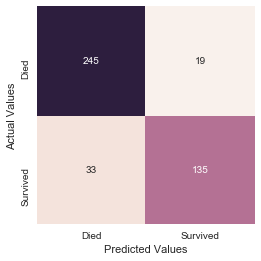

In [56]:
# Display the confusion matrix using a heat map
# Class labels:  0=Died, 1=Survived
mat = confusion_matrix (Y_test, Y_model)
print (mat)
sns.heatmap(mat, square=True, annot=True, cbar=False,
        fmt="d", xticklabels = ['Died','Survived'], 
                 yticklabels= ['Died','Survived'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [57]:
# Calculate Confusion Matrix Stats
TP = mat[0][0]
print ("True Positive: ", TP)
TN = mat[1][1]
print ("True Negative: ", TN)
FP = mat[1][0]
print ("False Positive: ", FP)
FN = mat[0][1]
print ("False Negative: ", FN)
P = TP + FN
print ("Actual Positive: ", P)
N = TN + FP
print ("Actual Negative: ", N)
TPR_str = str (TP) + '/' + str (P) + ' ='
TPR = TP / P
print ("True Positive Rate: ", TPR_str, TPR)
TNR_str = str (TN) + '/' + str (N) + ' ='
TNR = TN / N
print ("True Negative Rate: ", TNR_str, TNR)
PPV_str = str (TP) + '/' + str (TP + FP) + ' ='
PPV = TP / (TP + FP)
print ("Positive Predictive Value: ", PPV_str, PPV) 
NPV_str = str (TN) + '/' + str (TN + FN) + ' ='
NPV = TN / (TN + FN)
print ("Negative Predictive Value: ", NPV_str, NPV)
FNR_str = str (FN) + '/' + str (P) + ' ='
FNR = FN / P
print ("False Negative Rate: ", FNR_str, FNR)
FPR_str = str (FP) + '/' + str (N) + ' ='
FPR = FP / N
print ("False Positive Rate: ", FPR_str, FPR)
FDR_str = str (FP) + '/' + str (FP + TP) + ' ='
FDR = FP / (FP + TP)
print ("False Discovery Rate: ", FDR_str, FDR)
FOR_str = str (FN) + '/' + str (FN + TN) + ' ='
FOR = FN / (FN + TN)
print ("False Omission Rate: ", FOR_str, FOR)
ACC_str = str (TP + TN) + '/' +  str (P + N)
ACC = (TP + TN) / (P + N) 
print ("Accuracy: ", ACC_str, ACC)
ALL = P + N
print ("All: ", ALL)

True Positive:  245
True Negative:  135
False Positive:  33
False Negative:  19
Actual Positive:  264
Actual Negative:  168
True Positive Rate:  245/264 = 0.92803030303
True Negative Rate:  135/168 = 0.803571428571
Positive Predictive Value:  245/278 = 0.881294964029
Negative Predictive Value:  135/154 = 0.876623376623
False Negative Rate:  19/264 = 0.0719696969697
False Positive Rate:  33/168 = 0.196428571429
False Discovery Rate:  33/278 = 0.118705035971
False Omission Rate:  19/154 = 0.123376623377
Accuracy:  380/432 0.87962962963
All:  432


### Step K: Naïve Bayes Classification

In [58]:
# Create dummy variables for Pclass: PC_1, PC_2, and PC_3
# Add to DataFrame and remove 'Pclass' column
pc_dum = pd.get_dummies (titanic_data['Pclass'], 
                         prefix = 'PC')
titanic_data = pd.concat([titanic_data, pc_dum], axis=1)
titanic_data = titanic_data.drop('Pclass', axis=1)
titanic_data.head()

,Survived,Sex,Age,SibSp,ParCh,Fare,Em_C,Em_Q,Em_S,PC_1,PC_2,PC_3
PassengerId,,,,,,,,,,,,
1,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
3,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1,1,0,0
5,0,0,35.0,0,0,8.0500,0,0,1,0,0,1


In [59]:
Y = titanic_data['Survived'] 
X = titanic_data.drop(['Survived'], axis=1)

In [60]:
# Transform the predictors using the normalization 
# scaler to interval [0, 1]
sc = MinMaxScaler()
sc.fit(X)
X_norm = sc.transform(X)

In [61]:
# Find the 'k' best independent features 
# using the Chi2 algorithm
# Pclass Sex Age SibSp ParCh Fare Em_C Em_Q Em_S
max_score = 0
for k in range (1, 9):
    kbest = SelectKBest (score_func=chi2, k=k)
    X_best = kbest.fit_transform (X_norm, Y)
    gnb = GaussianNB()
    gnb.fit (X_best, Y)
    scores = cross_val_score (gnb, X_best, Y, cv=33)
    acc_score = scores.mean()
    if acc_score >= max_score:  
        max_score = acc_score
        best_k = k
print ("Best Test score and params:", max_score, best_k)

Best Test score and params: 0.856060606061 3


In [62]:
# xvsDv
# Get the best 'k' independent features, and call get_support
# method to retrieve the names of the features 
kbest = SelectKBest (score_func=chi2, k=best_k)
X_best = kbest.fit_transform (X_norm, Y)
feat_mask = kbest.get_support() #list of booleans
feature_names = list (X.columns.values)
best_features = [] # The list of your K best features
for mask, feature in zip (feat_mask, feature_names):
    if mask:
        best_features.append(feature)
best_features

['Sex', 'PC_1', 'PC_3']

In [63]:
# Part 5. It makes sence because Female and PC_1 were the most survival. And PC_3 were the most dided class.

In [64]:
# Display the accuracy of the predictions
acc_score = accuracy_score (Y_test, Y_model)
acc_score

0.87962962962962965

In [65]:
# Display classification report 
# - Class labels:  0=Died, 1=Survived
print ('Classification Report')
print (classification_report (Y_test, Y_model))

Classification Report
             precision    recall  f1-score   support

          0       0.88      0.93      0.90       264
          1       0.88      0.80      0.84       168

avg / total       0.88      0.88      0.88       432



[[245  19]
 [ 33 135]]


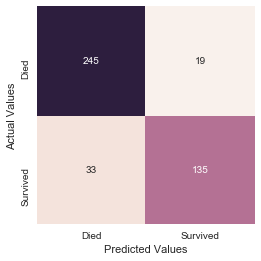

In [66]:
# Display the confusion matrix using a heat map
# Class labels:  0=Died, 1=Survived
mat = confusion_matrix (Y_test, Y_model)
print (mat)
sns.heatmap(mat, square=True, annot=True, cbar=False,
        fmt="d", xticklabels = ['Died','Survived'], 
                 yticklabels= ['Died','Survived'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [67]:
# Calculate Confusion Matrix Stats
TP = mat[0][0]
print ("True Positive: ", TP)
TN = mat[1][1]
print ("True Negative: ", TN)
FP = mat[1][0]
print ("False Positive: ", FP)
FN = mat[0][1]
print ("False Negative: ", FN)
P = TP + FN
print ("Actual Positive: ", P)
N = TN + FP
print ("Actual Negative: ", N)
TPR_str = str (TP) + '/' + str (P) + ' ='
TPR = TP / P
print ("True Positive Rate: ", TPR_str, TPR)
TNR_str = str (TN) + '/' + str (N) + ' ='
TNR = TN / N
print ("True Negative Rate: ", TNR_str, TNR)
PPV_str = str (TP) + '/' + str (TP + FP) + ' ='
PPV = TP / (TP + FP)
print ("Positive Predictive Value: ", PPV_str, PPV) 
NPV_str = str (TN) + '/' + str (TN + FN) + ' ='
NPV = TN / (TN + FN)
print ("Negative Predictive Value: ", NPV_str, NPV)
FNR_str = str (FN) + '/' + str (P) + ' ='
FNR = FN / P
print ("False Negative Rate: ", FNR_str, FNR)
FPR_str = str (FP) + '/' + str (N) + ' ='
FPR = FP / N
print ("False Positive Rate: ", FPR_str, FPR)
FDR_str = str (FP) + '/' + str (FP + TP) + ' ='
FDR = FP / (FP + TP)
print ("False Discovery Rate: ", FDR_str, FDR)
FOR_str = str (FN) + '/' + str (FN + TN) + ' ='
FOR = FN / (FN + TN)
print ("False Omission Rate: ", FOR_str, FOR)
ACC_str = str (TP + TN) + '/' +  str (P + N)
ACC = (TP + TN) / (P + N) 
print ("Accuracy: ", ACC_str, ACC)
ALL = P + N
print ("All: ", ALL)

True Positive:  245
True Negative:  135
False Positive:  33
False Negative:  19
Actual Positive:  264
Actual Negative:  168
True Positive Rate:  245/264 = 0.92803030303
True Negative Rate:  135/168 = 0.803571428571
Positive Predictive Value:  245/278 = 0.881294964029
Negative Predictive Value:  135/154 = 0.876623376623
False Negative Rate:  19/264 = 0.0719696969697
False Positive Rate:  33/168 = 0.196428571429
False Discovery Rate:  33/278 = 0.118705035971
False Omission Rate:  19/154 = 0.123376623377
Accuracy:  380/432 0.87962962963
All:  432
